In [ ]:
!mkdir models3

In [ ]:
!ls

In [2]:
%matplotlib inline

from __future__ import print_function

import keras
from keras.datasets import fashion_mnist
from keras import optimizers

from keras.models import Model
from keras.layers import Input, Dense, TimeDistributed, LSTM
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint

import cv2
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


def img_resize(org_imgs, target_size):
  x_imgs = []
  for i in range(0,org_imgs.shape[0]):
    x_img = cv2.resize(org_imgs[i], dsize=(target_size, target_size), interpolation=cv2.INTER_CUBIC)
    x_imgs.append(x_img)
  return np.array(x_imgs)


def plot_model(model_details):

    # Create sub-plots
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    
    # Summarize history for loss
    axs[1].plot(range(1,len(model_details.history['loss'])+1),model_details.history['loss'])
    axs[1].plot(range(1,len(model_details.history['val_loss'])+1),model_details.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_details.history['loss'])+1),len(model_details.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    
    # Summarize history for accuracy
    axs[0].plot(range(1,len(model_details.history['acc'])+1),model_details.history['acc'])
    axs[0].plot(range(1,len(model_details.history['val_acc'])+1),model_details.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_details.history['acc'])+1),len(model_details.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    
    # Show the plot
    plt.show()
    
    
# Training parameters.
batch_sizes = [64]
num_epochs = [50]
learning_rates = [0.001]
optimizers_name = ['adam']
num_classes = 10
node_sizes = [32]

# The data, shuffled and split between train and test sets.
(images, labels), (_, _) = fashion_mnist.load_data()

images_zoomed_in = img_resize(images, 48)
images_zoomed_in = images_zoomed_in.reshape(images_zoomed_in.shape[0], images_zoomed_in.shape[1], images_zoomed_in.shape[2], 1).astype('float32')

x_train = images_zoomed_in[0:50000]
x_test = images_zoomed_in[50000:60000]

y_train = labels[0:50000]
y_test = labels[50000:60000]


# x_train -= np.mean(x_train)
# x_test -= np.mean(x_train)

# x_train /= np.std(x_train)
# x_test /= np.std(x_train)

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


TRAIN_DATA_SIZE = x_train.shape[0]
TEST_DATA_SIZE = x_test.shape[0]

#TRAIN_BATCH_SIZE = 20
#TEST_BATCH_SIZE = 10

#train_step = int(TRAIN_DATA_SIZE/TRAIN_BATCH_SIZE)
#test_step = int(TEST_DATA_SIZE/TEST_BATCH_SIZE)


# Converts class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

train_gen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
train_gen.fit(x_train)
#train_batches = train_gen.flow(x_train, y_train, batch_size=TRAIN_BATCH_SIZE, shuffle=False, seed=10)

test_gen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
test_gen.fit(x_train)
#test_batches = test_gen.flow(x_test, y_test, batch_size=TEST_BATCH_SIZE, shuffle=False, seed=10)

#row, col, pixel = x_train.shape[1:]


best_model = None
best_accuracy = 0
best_batch_size = 0
best_epochs = 0
best_optimizer = ''
best_learning_rate = 0
best_node_size = 0

x_train shape: (50000, 48, 48, 1)
50000 train samples
10000 test samples


batch size    : 64
epochs        : 50
optimizer     : adam
learning rate : 0.001
node size     : 32
Epoch 1/50
781/781 [==============================] - 72s 92ms/step - loss: 1.1558 - acc: 0.5525 - val_loss: 0.8559 - val_acc: 0.6745

Epoch 00001: val_loss improved from inf to 0.85591, saving model to models3/rnn_lstm_64_50_adam_0.001_32.h5
Epoch 2/50
781/781 [==============================] - 67s 86ms/step - loss: 0.7199 - acc: 0.7345 - val_loss: 0.7084 - val_acc: 0.7359

Epoch 00002: val_loss improved from 0.85591 to 0.70842, saving model to models3/rnn_lstm_64_50_adam_0.001_32.h5
Epoch 3/50
781/781 [==============================] - 67s 86ms/step - loss: 0.6234 - acc: 0.7759 - val_loss: 0.5828 - val_acc: 0.7875

Epoch 00003: val_loss improved from 0.70842 to 0.58282, saving model to models3/rnn_lstm_64_50_adam_0.001_32.h5
Epoch 4/50
781/781 [==============================] - 66s 85ms/step - loss: 0.5345 - acc: 0.8056 - val_loss: 0.5530 - val_acc: 0.7993

Epoch 00004: val_loss improv

781/781 [==============================] - 67s 85ms/step - loss: 0.2658 - acc: 0.9020 - val_loss: 0.3050 - val_acc: 0.8882

Epoch 00038: val_loss improved from 0.30646 to 0.30499, saving model to models3/rnn_lstm_64_50_adam_0.001_32.h5
Epoch 39/50
781/781 [==============================] - 67s 85ms/step - loss: 0.2631 - acc: 0.9025 - val_loss: 0.3092 - val_acc: 0.8876

Epoch 00039: val_loss did not improve from 0.30499
Epoch 40/50
781/781 [==============================] - 67s 85ms/step - loss: 0.2637 - acc: 0.9025 - val_loss: 0.3021 - val_acc: 0.8897

Epoch 00040: val_loss improved from 0.30499 to 0.30206, saving model to models3/rnn_lstm_64_50_adam_0.001_32.h5
Epoch 41/50
781/781 [==============================] - 67s 85ms/step - loss: 0.2627 - acc: 0.9026 - val_loss: 0.3005 - val_acc: 0.8901

Epoch 00041: val_loss improved from 0.30206 to 0.30053, saving model to models3/rnn_lstm_64_50_adam_0.001_32.h5
Epoch 42/50
781/781 [==============================] - 67s 85ms/step - loss: 0.25

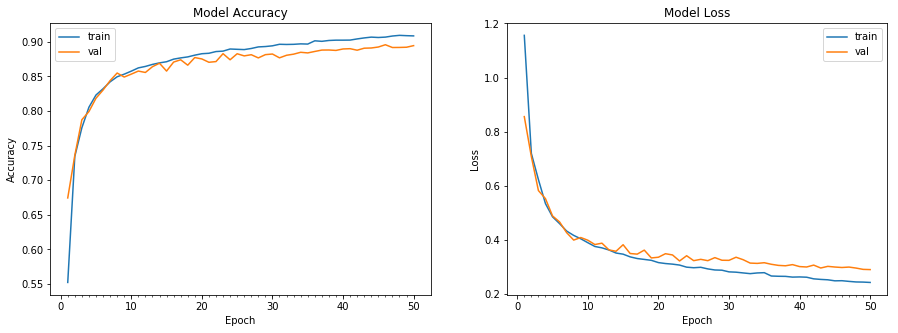

In [3]:
for batch_size in batch_sizes:
  for epochs in num_epochs:
    for optimizer_name in optimizers_name:
      for learning_rate in learning_rates:
        for node_size in node_sizes:
            print("==================")
            print("batch size    : {}".format(batch_size))
            print("epochs        : {}".format(epochs))
            print("optimizer     : {}".format(optimizer_name))
            print("learning rate : {}".format(learning_rate))
            print("node size     : {}".format(node_size))

            if optimizer_name == 'adam':
              optimizer = optimizers.Adam(lr=learning_rate)
            elif optimizer_name == 'rmsprop':
              optimizer = optimizers.RMSprop(lr=learning_rate)
            elif optimizer_name == 'sgd':
              optimizer = optimizers.SGD(lr=learning_rate)

            # Embedding dimensions.
            row_hidden = node_size
            col_hidden = node_size

            
            TRAIN_BATCH_SIZE = batch_size
            TEST_BATCH_SIZE = (batch_size)
            TEST_BATCH_SIZE
            
            train_step = int(TRAIN_DATA_SIZE/TRAIN_BATCH_SIZE)
            test_step = int(TEST_DATA_SIZE/TEST_BATCH_SIZE)
            
            train_batches = train_gen.flow(x_train, y_train, batch_size=TRAIN_BATCH_SIZE, shuffle=False, seed=10)

            test_batches = test_gen.flow(x_test, y_test, batch_size=TEST_BATCH_SIZE, shuffle=False, seed=10)

            row, col, pixel = x_train.shape[1:]
            
            
            # 4D input.
            x = Input(shape=(row, col, pixel))

            # Encodes a row of pixels using TimeDistributed Wrapper.
            encoded_rows = TimeDistributed(LSTM(row_hidden))(x)

            # Encodes columns of encoded rows.
            encoded_columns = LSTM(col_hidden)(encoded_rows)

            # Final predictions and model.
            prediction = Dense(num_classes, activation='softmax')(encoded_columns)

            model = Model(x, prediction)
            model.compile(loss='categorical_crossentropy',
                          optimizer=optimizer,
                          metrics=['accuracy'])

            


            # Training.
            # model.fit(x_train, y_train,
            #           batch_size=batch_size,
            #           epochs=epochs,
            #           verbose=1,
            #           validation_data=(x_test, y_test))
            
            model_file_name = "models3/rnn_lstm_{}_{}_{}_{}_{}.h5" . format(batch_size, epochs, optimizer_name, learning_rate, node_size)
            #model_file_name = "models2/rnn_lstm_{}_{}_{}_{}_{}_{}_{}.h5" . format(batch_size, epochs, optimizer_name, learning_rate, node_size, val_acc, val_loss)
          
            checkpoint = ModelCheckpoint(model_file_name, monitor='val_loss', verbose=1, save_best_only= True, mode='auto')
            #model_file_name = "models2/rnn_lstm_{}_{}_{}_{}_{}_{}_{}.h5" . format(batch_size, epochs, optimizer_name, learning_rate, node_size,val_acc,val_loss)
            
            best_model_file_name = "models3/rnn_lstm.h5"
            best_checkpoint = ModelCheckpoint(best_model_file_name, monitor='val_loss', verbose=0, save_best_only= True, mode='auto')
       
            h = model.fit_generator(train_batches, steps_per_epoch=train_step, validation_data=test_batches, callbacks=[checkpoint, best_checkpoint], validation_steps=test_step, epochs=epochs, verbose=1)
            #h = model.fit_generator(train_batches, validation_data=test_batches, callbacks=[checkpoint, best_checkpoint], verbose=1)
  
            plot_model(h)

In [ ]:
from google.colab import files

print(best_model)
print("Best Stats")
print("==========")
print("accuracy      : {}".format(best_accuracy))
print("batch size    : {}".format(best_batch_size))
print("epochs        : {}".format(best_epochs))
print("optimizer     : {}".format(best_optimizer))
print("learning rate : {}".format(best_learning_rate))
print("node size     : {}".format(best_node_size))

filepath = "models/rnn_lstm_best.h5"
files.download(filepath)